# РК №1 Новиков Богдан ИУ5-64Б Вариант 13

#### Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

#### Датасет №5
https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
%matplotlib inline
sns.set(style="ticks")

In [65]:
data = pd.read_csv('./Admission_Predict.csv', sep=",")
df = data
df.columns = df.columns.str.replace(' ', '') 

In [66]:
data.shape

(400, 9)

In [67]:
# shape and data types of the data
print(data.shape)
print(data.dtypes)

(400, 9)
SerialNo.             int64
GREScore              int64
TOEFLScore            int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceofAdmit       float64
dtype: object


In [68]:
data.head()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Создание категориального признака
В данном датасете нет категориального признака не в числовом виде, поэтому самостоятельно добавим его по полю thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [69]:
# Определите условия для каждой категории
conditions = [
    data['ChanceofAdmit'] >= 0.8, # good
    (data['ChanceofAdmit'] < 0.8) & (data['ChanceofAdmit'] >= 0.4), # average
    data['ChanceofAdmit'] < 0.4 # bad
]

# Определите соответствующие категории
choices = ['good', 'average', 'bad']

# Примените условия к датафрейму
data['chance_category'] = np.select(conditions, choices, default='unknown')

In [70]:
data.head(30)

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,chance_category
0,1,337,118,4,4.5,4.5,9.65,1,0.92,good
1,2,324,107,4,4.0,4.5,8.87,1,0.76,average
2,3,316,104,3,3.0,3.5,8.00,1,0.72,average
3,4,322,110,3,3.5,2.5,8.67,1,0.80,good
4,5,314,103,2,2.0,3.0,8.21,0,0.65,average
5,6,330,115,5,4.5,3.0,9.34,1,0.90,good
6,7,321,109,3,3.0,4.0,8.20,1,0.75,average
7,8,308,101,2,3.0,4.0,7.90,0,0.68,average
8,9,302,102,1,2.0,1.5,8.00,0,0.50,average
9,10,323,108,3,3.5,3.0,8.60,0,0.45,average


###  Замена на пропуски часть значений категориального признака
В данном датасете нет пропусков вообще, поэтому самостоятельно добавим их в категориальное поле

In [71]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

SerialNo. - 0
GREScore - 0
TOEFLScore - 0
UniversityRating - 0
SOP - 0
LOR - 0
CGPA - 0
Research - 0
ChanceofAdmit - 0
chance_category - 0


In [72]:
# Количество пропусков, которые будут добавлены в категориальном признаке
n_nan = 200

# Выбираем случайные индексы для добавления пропусков в категориальном признаке
index_nan = np.random.choice(data['chance_category'].size, n_nan, replace=False)

# Добавляем пропуски в поле chance_category
data['chance_category'].iloc[index_nan] = np.nan

/tmp/ipykernel_15710/2618270276.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['chance_category'].iloc[index_nan] = np.nan


In [73]:
# Количество пропусков, которые будут добавлены в количественном признаке
n_nan = 300

# Выбираем случайные индексы для добавления пропусков в количественном признаке
index_nan = np.random.choice(data['UniversityRating'].size, n_nan, replace=False)

# Добавляем пропуски в поле UniversityRating
data['UniversityRating'].iloc[index_nan] = np.nan

/tmp/ipykernel_15710/1863955982.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['UniversityRating'].iloc[index_nan] = np.nan


In [74]:
data.head(30)

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,chance_category
0,1,337,118,NaN,4.5,4.5,9.65,1,0.92,good
1,2,324,107,NaN,4.0,4.5,8.87,1,0.76,NaN
2,3,316,104,NaN,3.0,3.5,8.00,1,0.72,NaN
3,4,322,110,NaN,3.5,2.5,8.67,1,0.80,NaN
4,5,314,103,NaN,2.0,3.0,8.21,0,0.65,average
5,6,330,115,NaN,4.5,3.0,9.34,1,0.90,NaN
6,7,321,109,NaN,3.0,4.0,8.20,1,0.75,average
7,8,308,101,NaN,3.0,4.0,7.90,0,0.68,average
8,9,302,102,NaN,2.0,1.5,8.00,0,0.50,average
9,10,323,108,NaN,3.5,3.0,8.60,0,0.45,NaN


 ## Обработка пропусков в данных для категориального признака chance_category
 Будет выполняться за счёт метода "Внедрение значений" - *импьютация* со стратегией "most_frequent"

In [75]:
# Импьютация наиболее частыми значениями
from sklearn.impute import SimpleImputer# Фильтр для проверки заполнения пустых значений
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit_transform(data[['chance_category']])
data_imp[0:30]

array([['good'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['good'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['average'],
       ['good'],
       ['average'],
       ['average'],
       ['average'],
       ['average']], dtype=object)

In [76]:
data[['chance_category']] = data_imp
data.head(30)

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,chance_category
0,1,337,118,NaN,4.5,4.5,9.65,1,0.92,good
1,2,324,107,NaN,4.0,4.5,8.87,1,0.76,average
2,3,316,104,NaN,3.0,3.5,8.00,1,0.72,average
3,4,322,110,NaN,3.5,2.5,8.67,1,0.80,average
4,5,314,103,NaN,2.0,3.0,8.21,0,0.65,average
5,6,330,115,NaN,4.5,3.0,9.34,1,0.90,average
6,7,321,109,NaN,3.0,4.0,8.20,1,0.75,average
7,8,308,101,NaN,3.0,4.0,7.90,0,0.68,average
8,9,302,102,NaN,2.0,1.5,8.00,0,0.50,average
9,10,323,108,NaN,3.5,3.0,8.60,0,0.45,average


## Обработка пропусков в данных для количественного признака UniversityRating
 Будет выполняться за счёт метода "Внедрение значений" - *импьютация* со стратегий "median"

In [77]:
# Импьютация медианой
from sklearn.impute import SimpleImputer# Фильтр для проверки заполнения пустых значений
imp2 = SimpleImputer(missing_values=np.nan, strategy='median')
data_imp = imp2.fit_transform(data[['UniversityRating']])
data_imp[0:30]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [5.],
       [2.],
       [3.],
       [3.]])

In [78]:
data[['UniversityRating']] = data_imp
data.head(30)

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,chance_category
0,1,337,118,3.0,4.5,4.5,9.65,1,0.92,good
1,2,324,107,3.0,4.0,4.5,8.87,1,0.76,average
2,3,316,104,3.0,3.0,3.5,8.00,1,0.72,average
3,4,322,110,3.0,3.5,2.5,8.67,1,0.80,average
4,5,314,103,3.0,2.0,3.0,8.21,0,0.65,average
5,6,330,115,3.0,4.5,3.0,9.34,1,0.90,average
6,7,321,109,3.0,3.0,4.0,8.20,1,0.75,average
7,8,308,101,3.0,3.0,4.0,7.90,0,0.68,average
8,9,302,102,3.0,2.0,1.5,8.00,0,0.50,average
9,10,323,108,3.0,3.5,3.0,8.60,0,0.45,average


### График "Скрипичная диаграмма (violin plot)" для колонки "ChanceofAdmit"

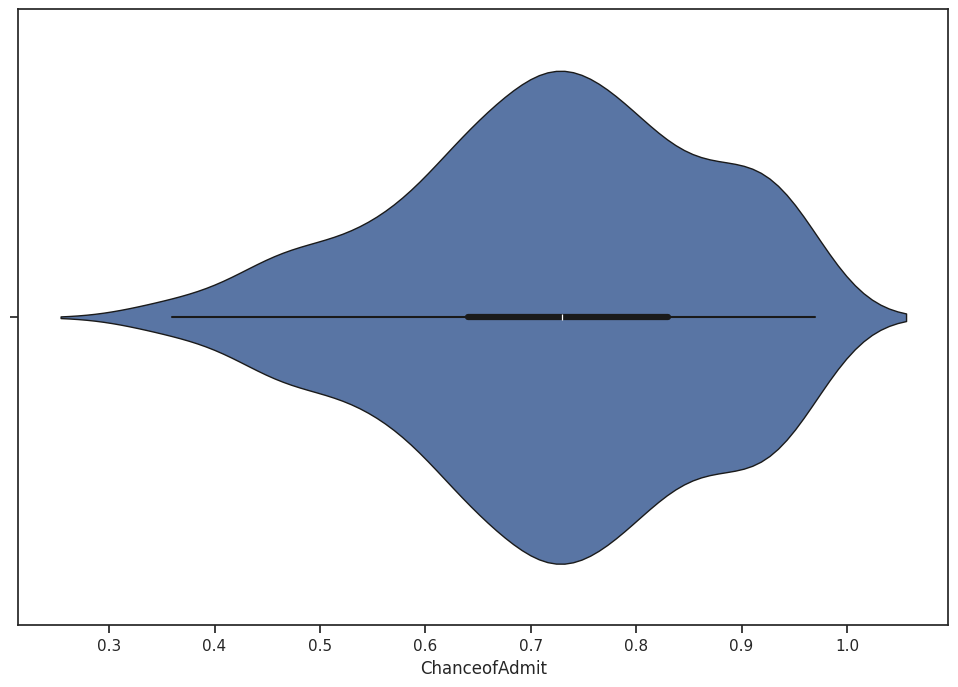

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение скрипичной диаграммы
sns.violinplot(data=data, x="ChanceofAdmit", linewidth=1, linecolor="k")

# Отображение графика
plt.show()